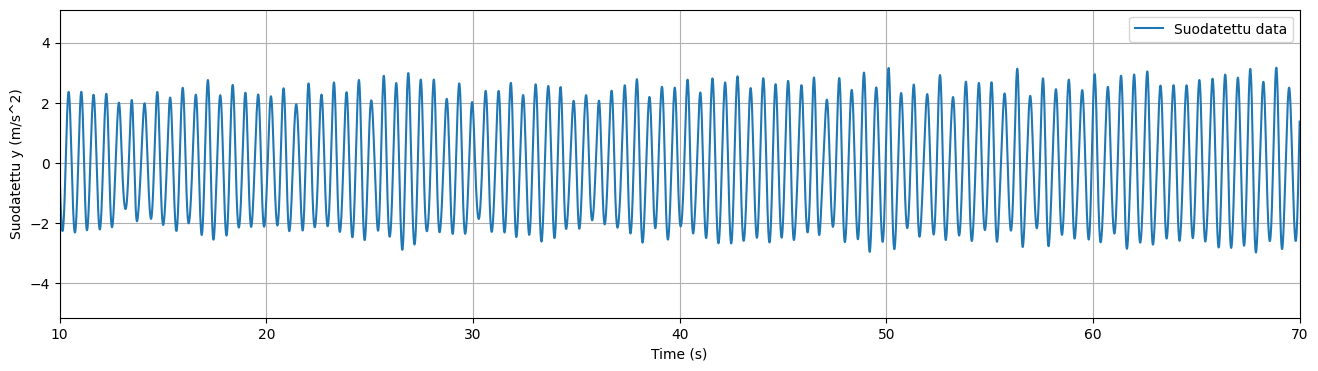

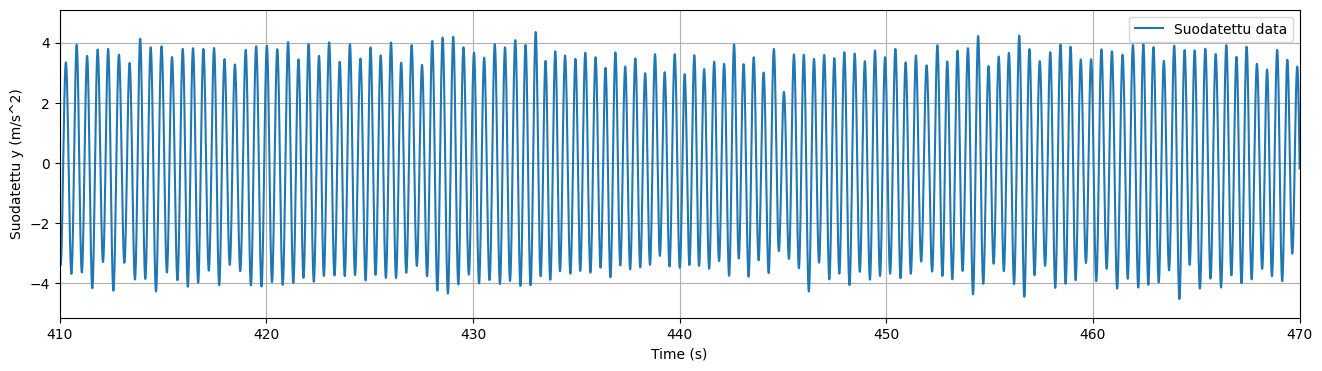

Tästä näkee selvästi kuinka vauhti on nopeampaa loppua kohti.

Askelten määrä on laskettuna suodatuksesta:  1022.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt
import folium
from math import radians, cos, sin, asin, sqrt

askelData = pd.read_csv('Linear Acceleration.csv')

askelData.head()

# plt.figure(figsize=(12,8))
# plt.subplot(3,1,2)
# plt.xlim(500, 570)
# plt.grid()
# plt.plot(askelData['Time (s)'], askelData['Linear Acceleration y (m/s^2)'])
# plt.ylabel('Acceleration y')
# plt.xlabel('Time (s)')
# Y on paras askeleen merkki

def butter_lowpass_filter(askelData, cutOff, nyq, order):
    normal_cutOff = cutOff / nyq
    b, a = butter(order, normal_cutOff, btype='low', analog=False)
    y = filtfilt(b, a, askelData)
    return y

data = askelData['Linear Acceleration y (m/s^2)']
totalTime = askelData['Time (s)'].max()
dataPisteet = len(askelData['Time (s)'])
taajuus = dataPisteet/totalTime
nyq = taajuus / 2
order = 3
cutOff = 1 / 0.4
filteredData = butter_lowpass_filter(data, cutOff, nyq, order)

plt.figure(figsize=(16,4))
#plt.plot(askelData['Time (s)'], data, label = 'Alkuperäinen data')
plt.plot(askelData['Time (s)'], filteredData, label = 'Suodatettu data')
plt.xlim(10, 70)
plt.xlabel('Time (s)')
plt.ylabel('Suodatettu y (m/s^2)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.plot(askelData['Time (s)'], filteredData, label = 'Suodatettu data')
plt.xlim(410, 470)
plt.xlabel('Time (s)')
plt.ylabel('Suodatettu y (m/s^2)')
plt.grid()
plt.legend()
plt.show()

print('Tästä näkee selvästi kuinka vauhti on nopeampaa loppua kohti.')
print()
askeleet = 0

for i in range(dataPisteet-1):
    if filteredData[i] / filteredData[i+1] < 0:
        askeleet = askeleet + 1/2

print('Askelten määrä on laskettuna suodatuksesta: ', askeleet)




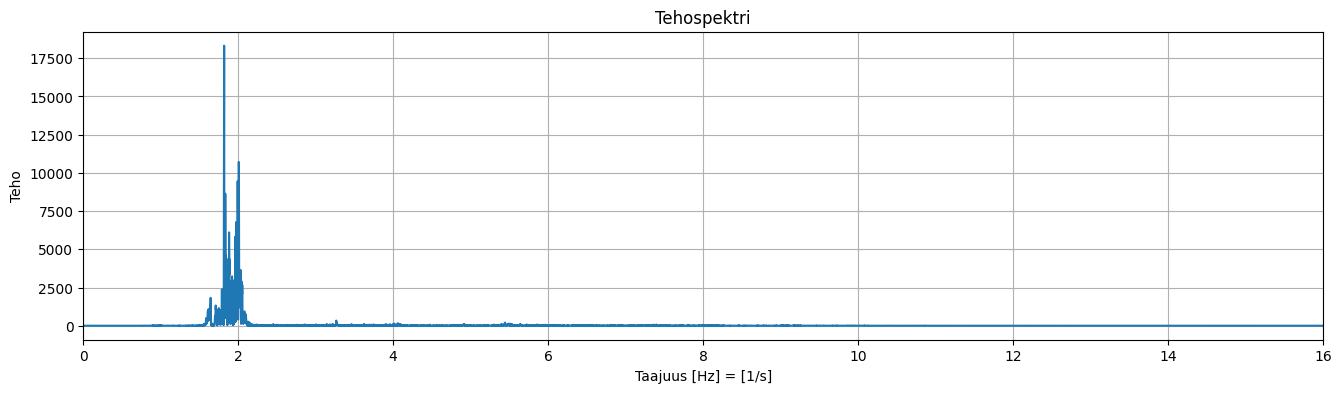

Askelmäärä fourier-analyysin avulla:  1002.0


In [3]:
askeleetFourier = askelData['Linear Acceleration y (m/s^2)']
time = askelData['Time (s)']
dataPoints = len(askeleetFourier)
samplingInterval = np.max(time) / dataPoints

fourier = np.fft.fft(askeleetFourier, dataPoints)
spectralDensity = fourier*np.conj(fourier)/dataPoints
frequency = np.fft.fftfreq(dataPoints, samplingInterval)
cropped = np.arange(1, int(dataPoints/2))

plt.figure(figsize=(16,4))
plt.plot(frequency[cropped], spectralDensity[cropped].real)
plt.title('Tehospektri')
plt.ylabel('Teho')
plt.xlabel('Taajuus [Hz] = [1/s]')
plt.xlim(0, 16)
plt.grid()
plt.show()

frequencyMax = frequency[cropped][spectralDensity[cropped] == np.max(spectralDensity[cropped])][0]
stepTime = 1 / frequencyMax
calculatedSteps = frequencyMax*np.max(time)

print('Askelmäärä fourier-analyysin avulla: ', np.round(calculatedSteps))

In [4]:
locationData = pd.read_csv('Location.csv')
locationData.head()

latitude1 = locationData['Latitude (°)'].mean()
longitude1 = locationData['Longitude (°)'].mean()

myOwnMap = folium.Map(location = [latitude1, longitude1], zoom_start = 16)

folium.PolyLine(locationData[['Latitude (°)', 'Longitude (°)']], color = 'red', weight = 3).add_to(myOwnMap)
myOwnMap.save('FysiikanLoppuProjektiKartta.html')




In [20]:
#kuljettu matka

def haversine(longitude1, latitude1, longitude2, latitude2):
    longitude1, latitude1, longitude2, latitude2 = map(radians, [longitude1, latitude1, longitude2, latitude2])

    distanceLongitude = longitude2 - longitude1
    distanceLatitude = latitude2 - latitude1
    a = sin(distanceLatitude/2)**2 + cos(latitude1) * cos(latitude2) * sin(distanceLongitude/2)**2
    c = 2 * asin(sqrt(a))
    radius = 6371
    return c * radius
    

locationData['DistanceCalculated'] = np.zeros(len(locationData))

for i in range(len(locationData)-1):
    longitude1 = locationData['Longitude (°)'][i]
    longitude2 = locationData['Longitude (°)'][i+1]
    latitude1 = locationData['Latitude (°)'][i]
    latitude2 = locationData['Latitude (°)'][i+1]
    print()
    locationData.loc[i+1, 'DistanceCalculated'] = haversine(longitude1, latitude1, longitude2, latitude2)


totalDistance = locationData['DistanceCalculated'].sum()
print(f"Kävelty matka: {totalDistance:.2f}km")

distanceToM = totalDistance * 1000
print("testi", distanceToM.round(3))




































































































































































































































































































































































































































































































































































Kävelty matka: 0.93km
testi 928.105
